## Task 5: Decision Tree on Titanic Dataset 
- Load Titanic dataset (or use a similar dataset). 
- Preprocess (handle missing values, encode categorical variables). 
- Train a DecisionTreeClassifier. 
- Visualize the decision tree using plot_tree. 
- Evaluate the model using accuracy and confusion matrix. 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Drop rows with missing target
df = df.dropna(subset=["age", "embarked", "sex", "fare", "survived"])

In [4]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = df[["pclass", "sex", "age", "fare", "embarked"]]
y = df["survived"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


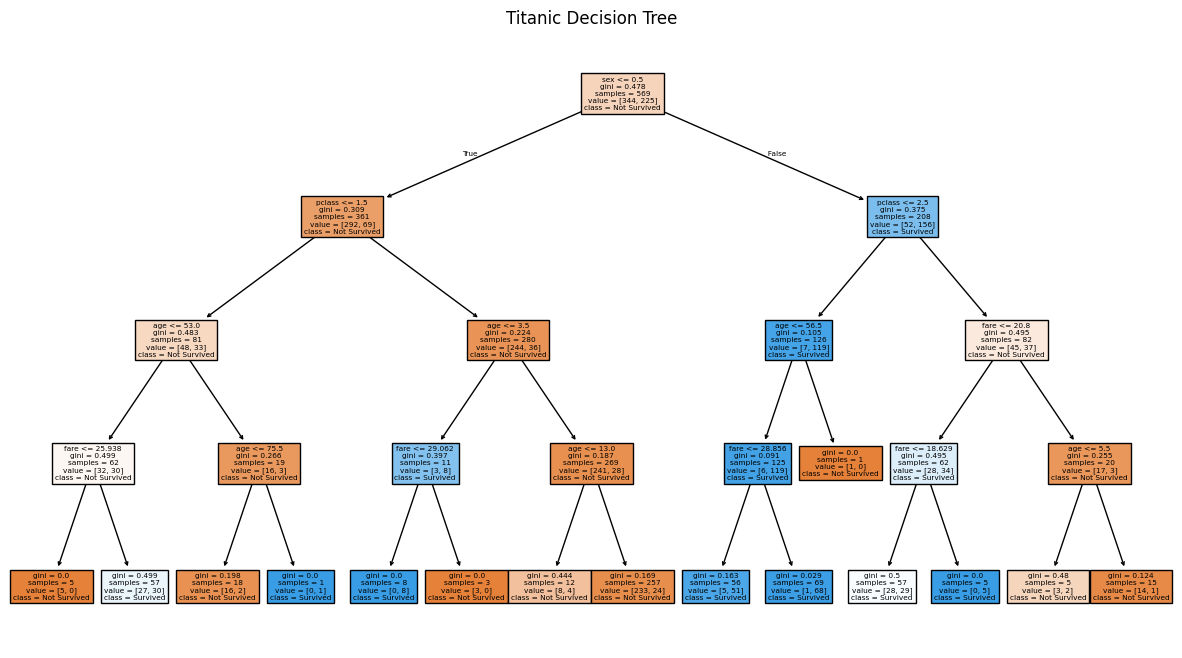

In [7]:
plt.figure(figsize=(15, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.title("Titanic Decision Tree")
plt.show()

In [8]:
#Evaluate Model
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7132867132867133
Confusion Matrix:
 [[60 20]
 [21 42]]
